

# Project: Investigate a Dataset (Medical Appointment No Shows)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Part 1: Introduction

I select: [No-show appointments](https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv) dataset which includes information about more than 100k medical appointments collect in prazil and the main focuse is "wether patient show-up for their appointments or not".

There are many attribute in this dataset describe characteristics about the patient as mentioned below:

- **`PatientId`**: its the patient ID; duplicated values may happen in case the same patient booked many appointments.
- **`AppointmentID`**: it indicates the appoint ID, each appontment must have a uniqe ID.
- **`Gender`**: its the patient's gender either (Female, Male). It has been noticed that Female has the higher proportion, they  takes care of their health more than Male.   
- **`scheduled_day`**:The Date\Time of the actuall appointment, when they have to visit the doctor. 
- **`appointment_day`**:  indicates the Date/Time the patient called or registered the appointment, and this is done before the appointment of course
- **`Age`**: indicates how old is the patient.
- **`Neighborhood`**: is the location of the hospital where the appointments take a place.

The following Attributes is answering question :
- **`Scholarship`**: is the patient enrolled in Brasilian welfare program Bolsa Família?. For more information visit https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia
- **`Hipertension`**: is the patient experiencing Hypertension ?
- **`Diabetes`**: is the patient experiencing Diabetes?
- **`Alcoholism`**:is the patient experiencing Alcoholism?
- **`Handcap`**: is the patient with special needs?
- **`SMS_received`**: is the patient receive a  text message-reminder?
- **`Show-up`**:Is the patient did not show up? The anser will be "YES" and "No" if the patient showed up to their appointment.

In this Report I will discuss 5 quesions :


Research Question 1 (Is the medical Condition affect Patients arrival  ?)


Research Question 2  (Are Female care about their health more than Male ? Are they show-up for their appointments more than men ? )


Research Question 3  (Are the Scholarship funds influence the patient show-up ?)


Research Question 4 (Does the age impact the patient presence for their Appointments?)


Research Question 5 ( Is receiving SMS reminder has relationship with the patient Absence?)





In [5]:
# First , I will write all the pakages I need in order to make my work more efficient.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


<a id='wrangling'></a>
## Part 2 : Data Wrangling

> In this stage of work , we **assess the data** to identify any problems in the data’s quality or structure, and 
then ***clean the data *** by modifying, replacing, or removing data to ensure that the dataset is of the highest quality and as well-structured as possible.
### 2.1 General Properties

In [6]:
# I will load my data and make sure its work by using "head"to print two line of my dataset.

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [7]:
#I used shape to find out the number of rows and columns.The dataset includes 14 columns and 110527 data rows.
df.shape

(110527, 14)

In [8]:
#Describe() give us full statistics about the quantitive columns 
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [9]:
# I used info() to have full information about the data types, number of non-null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


From the result we can say there is no missing data all has unique 110527 entries

I may adjust some data type, for example: 
scheduled_day , appointment_day is data\time type not a float .
For PatientID it's better if its "int" not float , and for memory space as well.
-**It will be fixed later in cleaning process**


#### Check Duplicate Values

In [10]:
# now I will Check if there is any duplicated rows 
df.duplicated().sum()

0

In [11]:
# As I mention earlier , the appointmentID should be unique .
# So I will check if it has duplicated value.

sum(df.AppointmentID.duplicated())

0

The result above shows no duplicates in the AppointmentID column.

In [12]:

sum(df.PatientId.duplicated())

48228

The result shows there is repeated number of PatientID.
It means that there are patients booked many appointments

In [13]:
# lets found out the top 5 patients along with number of appoitments they booked.

df.PatientId.value_counts().head(5)

8.221459e+14    88
9.963767e+10    84
2.688613e+13    70
3.353478e+13    65
2.584244e+11    62
Name: PatientId, dtype: int64

We may relay in AppointmentId rather than patintID in the analysis process
; however, that doesn't mean ignoring the patientID,where applicable we will use the reference number of patients, , to help identify any corrolation between specific patterns and the diversity of the studied group(s).

#### Check the validity of the data "Free of Error"

In [14]:
# Check if there is zero/negative in AppointmentID

df[df.AppointmentID < 0]['AppointmentID']

Series([], Name: AppointmentID, dtype: int64)

In [15]:
# Check if there is zero/negative in PatientId

df[df.PatientId <= 0]['PatientId']

Series([], Name: PatientId, dtype: float64)

In [16]:
# Make sure the dataset contain uniqe value and there is no unwanted one.

print('Gender:->',df.Gender.unique())
print('Diabetes:-> ',df.Diabetes.unique())
print('Alcoholism:-> ',df.Alcoholism.unique())
print('Hypertension:-> ',df.Hipertension.unique())
print('Handicap:-> ',df.Handcap.unique())
print('Scholarship:-> ',df.Scholarship.unique())
print('SMS Received:-> ',df.SMS_received.unique())


Gender:-> ['F' 'M']
Diabetes:->  [0 1]
Alcoholism:->  [0 1]
Hypertension:->  [1 0]
Handicap:->  [0 1 2 3 4]
Scholarship:->  [0 1]
SMS Received:->  [0 1]


In [17]:
print('Age:-> ',sorted(df.Age.unique()))

Age:->  [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]


In [18]:
# Show the column with negative values 

df[df.Age < 0]['Age']

99832   -1
Name: Age, dtype: int64

It noticed that the age has **negative value** , and the dataset documention not mention anything about it.
There are many possiblities : The patient could be a fetus not been born yet , or it might be a mistake.
To be save since its one record , I am going to exclude it from the analysis.
And I will keep **the Zeros** which represent the new born babies.

Moreover, there is ages gap between 102-115 which is weird , we will look at that later.

In [19]:
#Double Cheack if there is any null value
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64



### 2.2 Data Cleaning process
> After discussing the structure of the data and any problems that need to be clean process take place.
In this stage , I will Drop non-important column, rename column name & replace no_show data.
change some data type. Make sure at the end the dataset ready for analysis.

In [20]:
# For best practice Im going to convert all the columns to lower case letter
# I print two line to see the changes

df.rename(columns=lambda x: x.strip().lower(), inplace=True)
df.head(2)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [21]:
# First , Rename some of the column that Contain spelling mistakes or in the format
# I Will use "inplace " so, the changes made in the original dataset
df.rename(columns = {'patientid': 'patient_id','appointmentday':'appointment_id','scheduledday':'scheduled_day', 'appointmentday':'appointment_day'},inplace=True)
df.rename(columns = {'hipertension': 'hypertension','handcap': 'handicap','no-show':'attendance', 'neighbourhood':'neighborhood'},inplace = True)


In [22]:
print(df.columns)

Index(['patient_id', 'appointmentid', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighborhood', 'scholarship', 'hypertension',
       'diabetes', 'alcoholism', 'handicap', 'sms_received', 'attendance'],
      dtype='object')


#### Change the Data Type of some Columns 

In [23]:
# change the PatientID to int
df['patient_id'] = (df['patient_id']).astype('int64')

In [24]:
#change the Appointment and ScheduleDay to date-time , 
#sice the time of appointment_day is 000, it will be remove directly

df.appointment_day = df.appointment_day.apply(np.datetime64)
df.scheduled_day   = df.scheduled_day.apply(np.datetime64)


In [25]:
#check the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   patient_id       110527 non-null  int64         
 1   appointmentid    110527 non-null  int64         
 2   gender           110527 non-null  object        
 3   scheduled_day    110527 non-null  datetime64[ns]
 4   appointment_day  110527 non-null  datetime64[ns]
 5   age              110527 non-null  int64         
 6   neighborhood     110527 non-null  object        
 7   scholarship      110527 non-null  int64         
 8   hypertension     110527 non-null  int64         
 9   diabetes         110527 non-null  int64         
 10  alcoholism       110527 non-null  int64         
 11  handicap         110527 non-null  int64         
 12  sms_received     110527 non-null  int64         
 13  attendance       110527 non-null  object        
dtypes: datetime64[ns](2)

In [26]:
# I will include the age b\w 0 to 102.
# Drop the age rows that less than 0 and greater than 102
df.drop(df[(df.age < 0) | (df.age > 102)].index, inplace=True)


In [27]:
#For better understanding ,I will Replace No = Present and Yes = Absent as the dataset stated 
df['attendance'].replace({'No':'Present', 'Yes':'Absent'}, inplace=True)
df['attendance'].unique() # the replacement done successfuly

array(['Present', 'Absent'], dtype=object)

# Part 3: Exploratory Data Analysis##

 <a id='eda'></a>
> Exploring involves finding patterns in the data, visualizing relationships in the data, and building intuition about what you’re working with. After exploring, remove outliers and create better features from your data, also known as feature engineering.

### Research Question 1 (Is the medical Condition affect Patients arrival  ?) 

The first research question will discuess if there is a relationship between Patient medical conditions and the patient arrival to their appoitment. We will see wether these conditions have impact in the patients' behavior of arriving to their appointments.

The mddical condition as mentioned in the dataset are : Hypertension, Diabetes, Alcoholism, Handicap.


In [28]:
# See if Present/absences percentages of the appointments related to hypertensionn patient

hypertension_attendance = df[df.hypertension == 1].attendance.value_counts()\
                                       / df[df.hypertension == 1].attendance.value_counts().sum()
non_hypertension_attendance = df[df.hypertension == 0].attendance.value_counts() \
                                          / df[df.hypertension == 0].attendance.value_counts().sum()

# Printing the result
print("The arrival for hypertension patients are: \n\n"+ str(hypertension_attendance))
print('\n')
print("The arrival for patients with no-hypertension are: \n\n"+ str(non_hypertension_attendance))

The arrival for hypertension patients are: 

Present    0.826972
Absent     0.173028
Name: attendance, dtype: float64


The arrival for patients with no-hypertension are: 

Present    0.790985
Absent     0.209015
Name: attendance, dtype: float64


From the result , we can see a very slight increase about **3%** in the arrival % of hypertension patients. 

This small percentage doesn't reflect an actual influence in the patients' arrival decision.

In [29]:
# See if Present/absences percentages of the appointments related to diabetes Patient

diabetic_attendance= df[df.diabetes == 1].attendance.value_counts() / \
                                   df[df.diabetes == 1].attendance.value_counts().sum()
non_diabetic_attendance = df[df.diabetes == 0].attendance.value_counts() / \
                                      df[df.diabetes == 0].attendance.value_counts().sum()

# Printing the result
print("The arrival of diabetics  are : \n\n"+ str(diabetic_attendance))
print('\n')
print("The arrival of non-diabetics  are: \n\n"+ str(non_diabetic_attendance))


The arrival of diabetics  are : 

Present    0.819967
Absent     0.180033
Name: attendance, dtype: float64


The arrival of non-diabetics  are: 

Present    0.796389
Absent     0.203611
Name: attendance, dtype: float64


The diabetics arrival has **2%** rate increase more than non-diabetics 

, so we conclued that the diabetes is not a reason that affect the patient arrival behaviour.


In [30]:
# See if Present/absences percentages of the appointments related to people suffering from some handicap

handicap_arrival = df[df.handicap == 1].attendance.value_counts() / \
                                   df[df.handicap == 1].attendance.value_counts().sum()

non_handicap_arrival = df[df.handicap == 0].attendance.value_counts() / \
                                     df[df.handicap == 0].attendance.value_counts().sum()


# Printing out the information
print("The arrival of handicap patients are: \n\n"+ str(handicap_arrival))
print('\n')
print("The arrival of patients with No-handicap are: \n\n" + str(non_handicap_arrival))

The arrival of handicap patients are: 

Present    0.821884
Absent     0.178116
Name: attendance, dtype: float64


The arrival of patients with No-handicap are: 

Present    0.797643
Absent     0.202357
Name: attendance, dtype: float64


The arrival of Patients with some kind of handicap have only increased with approximetly **2%**. 

This slight % doesn't indicates any kind of correlation between handicap and appointment show-up.

In [31]:
# See if Present/absences percentages of the appointments related to people suffering from alcoholism


alcoholism_attendance = df[df.alcoholism == 1].attendance.value_counts() / \
                                   df[df.alcoholism == 1].attendance.value_counts().sum()

not_alcoholism_attendance = df[df.alcoholism == 0].attendance.value_counts() / \
                                     df[df.alcoholism == 0].attendance.value_counts().sum()

# Printing the result
print("The arrival of alcoholism patient are: \n\n"+ str(alcoholism_attendance))
print('\n')
print("The arrival of not-alcoholism are: \n\n"+ str(not_alcoholism_attendance))

The arrival of alcoholism patient are: 

Present    0.798512
Absent     0.201488
Name: attendance, dtype: float64


The arrival of not-alcoholism are: 

Present    0.79807
Absent     0.20193
Name: attendance, dtype: float64


Last , The difference between patients who are alcoholics and those who aren't,its almost nothings.very small diffrence that doesn't count ! I thought it will be a big diffrences but its the oppsite **The diffrence is :0.00044 %** .

This result indicates that probably there is no relation b\w alcoholism and the appoinment arrival

Text(0, 0.5, 'Patient medical conditions')

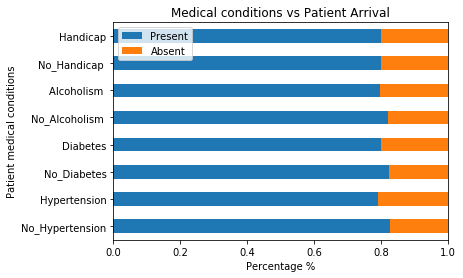

In [32]:
# For better represention of the ratios of present \absent for diffrent medical conditions.
#I Create bar plot with the different possible categories of conditions in the X axis
#, and the percentage values on the Y axis.
# but first , I have to create DataFrame contain all the factors then I will craete the graph

pd.DataFrame([hypertension_attendance, non_hypertension_attendance, 
            handicap_arrival, non_handicap_arrival ,
             diabetic_attendance, non_diabetic_attendance,
            alcoholism_attendance, not_alcoholism_attendance], 
             index = ['No_Hypertension', 'Hypertension', 'No_Diabetes', 'Diabetes', 
                      'No_Alcoholism ', 'Alcoholism ', 'No_Handicap ', 'Handicap']
            ).plot.barh(stacked = True , title='Medical conditions vs Patient Arrival')

plt.xlim(0.0, 1.0)

plt.xlabel("Percentage %")
plt.ylabel("Patient medical conditions")

From the above graph , we can say that the Pateient medical condition doesn't appear to have a significant affect the attendance behaviour of patients.

### Research Question 2  (Are Female care about their health more than Male ? Are they show-up for their appointments more than men ? )

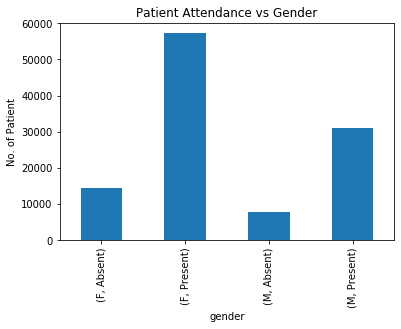

In [33]:

# Create Function for bar plot that count the number of Present\ Absence for both Gender.

def plot_bar(variable):
    df.groupby([variable, 'attendance']).count()['age'].plot(kind='bar')
    
    plt.title('Patient Attendance vs Gender')
    plt.xlabel(variable)
    plt.ylabel('No. of Patient');

plot_bar('gender')

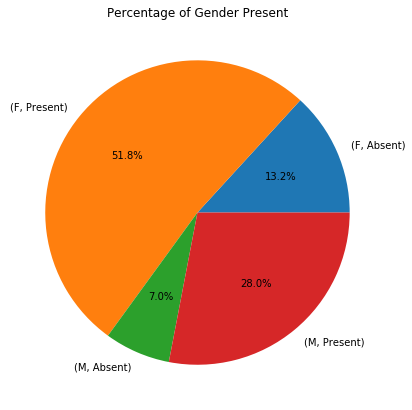

In [34]:
# Create function for pie chart to show the ratios

def plot_pie(variable):
    df.groupby([variable, 'attendance']).count()['age'].plot(figsize=(7,7),kind='pie',autopct='%1.1f%%')
    plt.ylabel('');
 
plt.title('Percentage of Gender Present')
plot_pie('gender')

From the above findings , 


the % of female presents has a big diffrence with 38.6%. In the other side, men have higher percentage of absents 28%> 7% absent of women, wich proved that Female take care of their health more than male , we can say women have commitment to attende their appointments more than men.

### Research Question 3  (Are the Scholarship funds influence the patient show-up ?  )

In [35]:
#First , find the number of patients that receive/or not scholarship only in relation to the 'attendance' variable
# Group scholarship and attendance so, I can sount the number of absent and present.

scholarship_count = df.groupby(['scholarship', 'attendance'])['scholarship'].count().unstack('attendance')

#I will convert the number of patients who present/absent to percentages of the total

scholarship_count.apply(lambda row: row / row.sum(), axis = 1)

attendance,Absent,Present
scholarship,,
0,0.198053,0.801947
1,0.237363,0.762637


The 0 - represent patient with no scholarship


the 1 - represent patient with scholarship

Text(0.5, 0, 'Scholarship received')

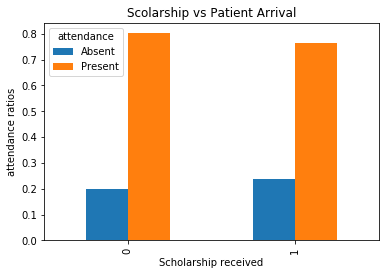

In [36]:
#Create bar chart to show the percentage

scholarship_count.apply(lambda row: row / row.sum(), axis = 1).plot(kind='bar')

plt.title('Scolarship vs Patient Arrival')
plt.ylabel("attendance ratios")
plt.xlabel("Scholarship received")

The answer for this question is No , the Scholarship doesn't influance the patient presence to their appoitment.

This result shows that the percentage of patients who are on scholarship are more likely to skip their appointments rather than come with diffrence of **4%** and those patient who didn't enroll on the scholarship are more likely to attend their appoitment.



### Research Question 4 (Does the age impact the patient presence for their Appointments?)

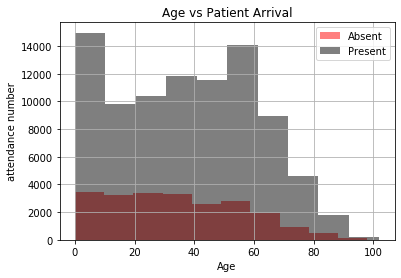

In [37]:
# I will assign value to present and Absent , so I can call it when I create the graph

Present = df.attendance == 'Present'
Absent = df.attendance == 'Absent'


df.age[Absent].hist(alpha = 0.5, label = 'Absent', color='red')
df.age[Present].hist(alpha = 0.5, label = 'Present', color='black')

plt.title("Age vs Patient Arrival")
plt.ylabel("attendance number")
plt.xlabel("Age")
plt.legend();

In general , its good that the number of present exceed the absent.


Althogh , no. of absent starts with high numbers from 0 age till the 40s." They more likely to not attend"


 then the numbers starts slightly to drop till the 80s.
 
 
 from 80-102 the number of absent is very small.
 
 so , yes I think age affect the patient presence.

### Research Question 5  ( Is receiving SMS reminder has relationship with the patient Absence?)

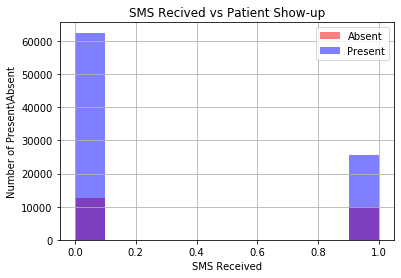

In [38]:
# I alredy define the Absent\ present in the previous steps .
#So , I will call it directly

df.sms_received[Absent].hist(alpha = 0.5, label = 'Absent', color='red')
df.sms_received[Present].hist(alpha = 0.5, label = 'Present', color='blue')

plt.title('SMS Recived vs Patient Show-up')
plt.xlabel("SMS Received")
plt.ylabel("Number of Present\Absent")
plt.legend();

From the above figure , we can see patient who didn't receive SMS appear to attend more than those who received.
Even when the number of absent slightle more than those who receive , the number of show-up is more which is good.

<a id='conclusions'></a>
## Conclusions

In conclusion , based on the questions that have been studied the following points :


**-** The medical conditions (Hypertension, Diabetes, Alcoholism, Handicap) didn't seem to have any significant influence on patient arrival rates.

**-** The female are paying attention to their health more than male , which was very clearly from their present ratio.

**-** Receiving The state scholarship funds didn't seem to have a major influence on patient arrival rates. In the other side, it needs to be mentioned that patients who are on scholarship are slightly less likely to attend their appointments.

**-** The age of the patient , it might influence their attendance

**-** Receiving SMS reminder has no big impact on the patient arrival.


**Limittion conducted during the project :**


1. Some of the data not cpmoleted such as the Appoitment time dimenion were set to 00:00:00
2. Dropped some data entries because there is no sufficient explanation on some cases. For example, the negative age number ,and the there is missing range of ages b\w 102-115 which makes a big diffrence.I had to exclude 6 data entries from the original dataset. original size 110527; new size: 110521
3. I think we need more data and more factors to study , since some result not conivencing such as alcoholism don't effect the patient appearnce ! 
4. The quantitive chart such as scatter diagrams not used due to most of the data used in the analysis was categorical ,so bar chart ,pie chart for example was the best option to view data.
5. There are more important factors to consider such as the insurance type and for people who doesn't have.


    

<a id='conclusions'></a>
## Refrences 
To get more info about the data , I visit : https://www.kaggle.com/joniarroba/noshowappointments

To search for some codes strcture :https://stackoverflow.com/

To see the workflow of the project , I visit : https://github.com/search?p=9&q=Investigate+a+Dataset&type=Repositories